# 합성곱 신경망 (Convolution Neural Network (CNN))
- <b>CNN은 ‘Convolution Neural Network’</b>의 약자이다. 합성곱 신경망이라는 뜻이며 <b>이미지 분류</b>에 흔히 쓰인다. 
> (ex. 고양이, 강아지, 토끼 등의 사진을 입력했을 때 이를 구분할 수 있도록) 전체적인 Flow는 다음 사진과 같다. 
- 크게는 <b>Input $\rightarrow$ Feature Learing $\rightarrow$ Classification</b> 이렇게 세 단계로 구분된다.<p>
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-0.png" style="max-width: 60%; height: auto;">

# 합성곱 (Convolution)
- [[합성곱 wiki]](https://ko.wikipedia.org/wiki/%ED%95%A9%EC%84%B1%EA%B3%B1)
- <b>합성곱(合成-), 또는 콘벌루션(convolution)</b>은 하나의 함수와 또 다른 함수를 반전 이동한 값을 곱한 다음, 구간에 대해 적분하여 새로운 함수를 구하는 수학 연산자이다.
- 두 개의 함수 $f$와 $g$가 있을 때, 두 함수의 합성곱을 수학 기호로는 $f*g$와 같이 표시한다.
- 합성곱 연산은 두 함수 $f, g$ 가운데 하나의 함수를 <b>반전(reverse), 전이(shift)</b>시킨 다음, 다른 하나의 함수와 곱한 결과를 적분하는 것을 의미한다. 
- 이를 수학 기호로 표시하면 다음과 같다.
>  $f(t)*g(t)=(f*g)(t)=\int _{{-\infty }}^{\infty }f(\tau )g(t-\tau )\,d\tau$ 
- 또한 $g$ 함수 대신에 $f$ 함수를 반전, 전이 시키는 경우 다음과 같이 표시할 수도 있다. 이 두 연산은 형태는 다르지만 같은 결과값을 갖는다.
>  $f(t)*g(t)=(f*g)(t)=\int _{{-\infty }}^{\infty }f(t-\tau )g(\tau )\,d\tau$ 
- 위의 적분에서 적분 구간은 함수 $f$와 $g$가 정의된 범위에 따라서 달라진다.

- 또한 두 확률 변수 $X$와 $Y$가 있을 때 각각의 확률 밀도 함수를 $f$와 $g$라고 하면, $X$와 $Y$가 서로 독립이라는 가정 하에, $X+Y$의 확률 밀도 함수는 
> $f*g$로 표시할 수 있다.

# 합성곱 쉽게 이해하기
- 어떤 위치에서 공을 떨어뜨리는 경우를 생각해 보자. 
- 공을 떨어뜨렸을 때 공이 굴러가 $a$ 지점에 위치하고, 다시 $a$위치에서 공을 떨어뜨려 최종적으로 $c$ 지점에 위치 할 경우를 생각해 보자.
- <b>그러면 c에 도달할 확률이 어떻게 될까? 단계별로 하나씩 생각해 보면,</b>
> 1) 공이 떨어져 굴러가 위치할 확률 분포를 $f$라고 한다면, $a$지점에 위치할 확률은 $f(a)$이다.
> 2) 처음 위치한 $a$지점에서 공을 주워서 다시 떨어뜨릴때, 공이 떨어져 구럴가 위치할 확률 분포를 $g$라고 한다면, $b$지점에 위치할 확률은 $g(b)$가 된다.
- 그림으로 표시하면 다음과 같다.
> <img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-1.png" style="max-width: 50%; height: auto;">

- $f(a)$의 경우 공을 떨어뜨려 바로 아래에 위치할 확률이 가장 높고, 그 위치에서 멀리 굴러가 위치할 확률은 점점 낮아 진다. $g(b)$의 경우도 마찬가지. 
- 만일 공이 떨어져 굴러갈 수 있는 전체 범위가 $c$로 고정되어 있다면, $a + b = c$ 이므로 $a$가 정해지면 $b = c - a$ 로 $b$의 위치도 정해진다. 
- 따라서, 처음에는 $a$지점에 다음번에는 $b$지점에 위치할 확률이 정해지면 최종거리 $c$에 도달할 확률은 간단히 $f(a)*f(b)$로 정해진다.
- 그런데, 만일 $c$가 $3$이라고 했을 때 $a$와 $b$가 모두 $0$보다 같거나 큰 정수라고 한다면, 가능한 조합은 $(0, 3), (1, 2), (2, 1), (3, 0)$ 4개가 있을 수가 있고, 각 경우의 확률을 모두 더해야 최종 지점 $3$에 도달할 확률을 구할 수 있다.
- 이 중 $(1, 2), (0, 3)$의 확률의 경우를 그림으로 표시하면 다음과 같다.
> <img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-2.png" style="max-width: 70%; height: auto;">

- 따라서 이 모든 확률을 고려하여 $c$ 지점에 도달할 확률은, 
> $f(0)\cdot f(3)+f(1)\cdot f(2)+f(2)\cdot f(1)+f(3)\cdot f(0)$, 이것이 바로 <b>합성곱(convolution)</b> 이다.
- 수식으로 표시하면 다음과 같다.
> $(f∗g)(c)=\sum_{a+b=c} f(a)\cdot g(b)$   
- 여기서, $b = c - a$ 이므로, 위 식은   
> $(f∗g)(c)=\sum_{a}f(a)\cdot g(c−a)$ 가 된다.

# 합성곱(Convolution)을 신경망으로 표현하기

- 합성곱(Convolution)을 신경망(Neural network)로 표현   
> <img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-3.png" style="max-width: 70%; height: auto;">

- 처음에 공을 떨어뜨려 $a$위치에 도달할 확률을 $f(a)$라고 한다면 <b>위치 $a$는 다양</b>하게 있을 수가 있기에 $f(a)$ 역시 다양하게 있을 수가 있다.
- 이들 위치 중 <b>특정한 위치 $a$</b>에서 다시 공을 떨어뜨려 $b$위치에 도달할 확률 $g(b)$도 <b>다양</b>하게 있을 수가 있기에 특정한 위치 $a$에서 $c$ 위치에 도달할 확률 $f(a)\cdot f(c−a)$ 또한 다양하게 있을 수 있다. 
- 이를 신경망으로 표시하면 다음과 같다.
> <img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-4.png" style="max-width: 70%; height: auto;">

- 이제 특정 $a$가 아닌 <b>모든 $a$</b>에 대해서 일반화시켜서 합성곱을 신경망으로 표현하면 다음과 같다.   
> <img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-5.png" style="max-width: 70%; height: auto;">

# 일반적인 기술

- 지금까지 설명했던 합성곱을 시간의 함수로 기술하면... 
- 거리는 속도와 시간으로 표현할 수 있다.$(s=vt)$ 
- 만일 속도$(v)$가 일정하면 거리$(s)$는 시간$(t)$의 함수로만 나타낼 수 있다. 
- 앞에서 전체 거리 $c$를 고정시키면 $c$를 만족시키는 $a$와 $b=(c-a)$는 다양하게 있을 수 있다. 
- <b>$c$를 $t$, $a$를 $\tau$로 표시하면($t$는 고정값, $\tau$는 합성곱에서 변하는 값)</b>
- 합성곱은
> $(f∗b)(t)=\sum_{\tau}f(\tau)\cdot g(t−\tau)$
> 로 나타낼 수 있다.
- 이를 이산형 데이터(discrete data)뿐만 아니라 연속 데이터(continuous data)로 확장해서 정리하면 위의 식은,
> $(f∗b)(t)= \int_0^t f(\tau)g(t−\tau)d\tau$
- 즉, $t$는 큰 구간, $\tau$는 큰 구간내에서 변하는 작은 구간으로 생각할 수 있다.

# 합성곱 계산

- <b>합성곱(Convolution)</b>의 정의
> $(f∗g)(t)=f(t)∗g(t)=\int_{-\infty}^{\infty} f(\tau)\cdot g(t−\tau)d\tau$
- 만일, <b>합성곱이 $0 \sim t$ 사이에서만 값을 가진다면</b>,(이외의 구간은 모두 $0$)
> $(f∗g)(t)=f(t)∗g(t)=\int_{0}^{t} f(\tau)\cdot g(t−\tau)d\tau$ 
- 로도 나타낼 수 있다.
- 합성곱의 계산은 복잡하기에 예를 들어서 설명하기로 한다. 다음의 함수가 있다.
> $f(t) = 
\left\{
    \begin{array}{ll}
        1 & \mbox 0 \le t \le 3\\
        0 & \mbox t < 0 \ or \ t > 3
    \end{array}
\right.$   <p>
> $g(t) = 
\left\{
    \begin{array}{ll}
        e^{-at} & \mbox t \ge 0\\
        0 & \mbox t < 0 
    \end{array}
\right.$

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-6.png" style="max-width: 70%; height: auto;">

- 두 함수의 합성곱은,
> $(f∗g)(t)=\int_{-\infty}^{\infty} f(\tau)\cdot g(t−\tau)d\tau$
- 그림으로 표시하면,
> <img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-7.png" style="max-width: 70%; height: auto;">

- 합성곱은,
> $(f*g)(t) = 
\left\{
    \begin{array}{ll}
        0 & \mbox t < 0 \\
        \dfrac{1}{a}[1-e^{-at}] & \mbox 0 \le t < b \\
        \dfrac{1-e^{-ab}}{a}e^{-a(t-b)} & \mbox t \ge b 
    \end{array}
\right.$ 

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-8.png" style="max-width: 70%; height: auto;">

# 다양한 합성곱의 계산 예

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/CNN1.gif" style="max-width: 70%; height: auto;">

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/CNN2.gif" style="max-width: 70%; height: auto;">

## CNN에서 사용되는 합성곱
- <b>‘필터(filter)’</b>라는 개념에 대해 먼저 이해해야한다 (<b>‘커널(kernel)’</b>이라고도 불린다). 
- 이미지를 행렬로 표현할 경우, 자주 쓰이는 필터는 다음과 같은 2개의 3x3 행렬이다. 
- 좌측 [Sobel](https://en.wikipedia.org/wiki/Sobel_operator)-X 필터는 수직으로 필터링되고, 우측 Sobel-Y 필터는 수평으로 필터링된다.<p>
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-9.png" style="max-width: 50%; height: auto;"> <p>

- 다음과 같은 여자 사진이 있다. 이 사진에 위에서 언급한 2개의 필터를 씌운다고 생각해보자.<p>
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-10.png" style="max-width: 40%; height: auto;"> <p>

- 다음 사진이 2개의 필터를 씌운 사진이다. (좌측이 Sobel-X, 우측이 Sobel-Y)<p>
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-11.png" style="max-width: 40%; height: auto;"> <p>

- 2개의 필터를 사용한 사진을 합치면 다음과 같이 원본 사진의 <b>feature</b>를 확인할 수 있다.<p>
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-12.png" style="max-width: 40%; height: auto;"> <p>

- filter란 이미지에서 특정 feature를 추출하기 위한 거름막이라고 생각하면 된다. 
> (참고: CNN은 이미지 분류에 특화되어있다. 이때 이미지의 Color에는 R,G,B에 대한 3개의 채널로 구성되는데 보통 연산량을 줄이기위해 색상 정보를 없애고 흑백으로 만들어 처리한다.)

# CNN에서 사용되는 합성곱 (filter 이용하기)
- CNN에서 다음과 같이 행렬을 통해 filter를 적용/연산한다. 
- 입력 데이터의 좌측 상단에서부터 우측 방향으로 필터에 해당하는 행렬크기(다음 예시에서는 $3\times 3$) 만큼 나눈 뒤 합성곱을 계산한다. 
- 서로 대응하는 원소끼리 곱한 후 총합을 구하면 된다. 이러한 연산을 <b>Fused Multiply-Add(FMA)</b>라고 한다.
<pre>
(1x2 + 2x0 + 3x1) + (0x0 + 1x1 + 2x2) + (3x1 + 0x0 + 1x2) = 15
(2x2 + 3x0 + 0x1) + (1x0 + 2x1 + 3x2) + (0x1 + 1x0 + 2x2) = 16</pre>
 $\dots$

- 이때 필터가 움직이는 간격을 <b>스트라이드(Stride)</b>라고 부른다. 여기서는 스트라이드가 1인 경우이다.<p>
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-13.png" style="max-width: 70%; height: auto;"> <p>

- 이를 수식으로 나타내면 다음과 같다. (이미지의 경우 2차원 평면(높이, 너비)으로된 픽셀로 구성되어있어 변수의 개수가 다르다)
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-14.png" style="max-width: 60%; height: auto;"> <p>

- 위에서 도출해낸 ‘합성곱’ 공식에서는 $g$ 함수의 인자에서 각각 $x$와 $y$를 빼야 정상이다. $g(i-x, j-y)$ 처럼... 왜 ‘+’가 사용되는걸까?
- 그 이유는 합성곱과 유사한 ‘교차상관’을 이용하기 때문이다. <b>대부분의 CNN 알고리즘에서는 ‘합성곱’ 그 자체를 이용하지않는다.</b> 
- <b>왜냐면 filter를 학습시키는 것이 목적이기 때문이다.</b> 만약 filter에 합성곱을 적용한다면 저 filter를 반전(뒤집기)시켜야 한다. 이는 불필요한 작업이다.

# ReLU ‘활성화 함수’

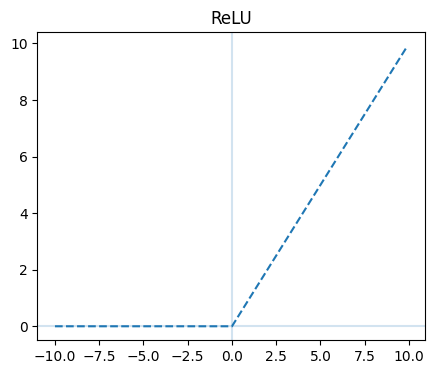

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10, 10, 0.1)
plt.figure(figsize=(5,4))
plt.plot(x, tf.keras.activations.relu(x), ls='--')
plt.title('ReLU')
plt.axvline(0, alpha=0.2)
plt.axhline(0, alpha=0.2)
plt.show()

- 다음 그림은 ReLU를 통과시킨 노드이다. <b>0 혹은 음수값은 0으로 치환시키고 나머지 양수값은 그대로</b> 가져가는 것을 확인할 수 있다.
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-15.png" style="max-width: 50%; height: auto;"> <p>

# Pooling 
- 세로, 가로 방향의 공간을 줄이는 연산으로 <b>Sub-sampling</b>이라고도 한다. 
- 쉽게 말하면 일정 영역을 선택해서 특정 값을 하나 가져오는 것이다. 
- <b>Max pooling</b> 방식은 해당 영역의 최대값을 가져오는 것이고 <b>Average pooling</b> 방식은 해당 영역의 평균 값을 가져오는 것이다. 
- 다음 예제는 <b>Max pooling</b> 방식의 예이며 이미지 인식 분야에서는 주로 이를 사용한다.<p>
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-16.png" style="max-width: 60%; height: auto;"> <p>

# Padding
- 패딩(padding)이란 convolution 연산을 수행하기 전에 <b>입력 데이터 주변을 특정 값(예를 들어 $0$)으로 채우는 것</b>을 말하며, convolution 연산에서 자주 이용되는 방법.
- <b>convolution 연산을 수행하면서 데이터 크기(shape)가 줄어드는 단점을 방지하기 위해 사용.
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-17.png" style="max-width: 60%; height: auto;"> <p>

- 입력 데이터 크기 $(H,W)$, 필터 크기 $(FH,FW)$, 패딩 $P$, 스트라이드 $S$ 일때, 출력 데이터$(OH,OW)$
- $OH = \dfrac{H+2P-FH}{S}+1$ , $OW = \dfrac{H+2P-FW}{S}+1$

- <code> padding='valid' </code> : padding 사용하지 않음.
- <code> padding='same' </code> : 출력데이터의 크기를 입력데이터의 크기와 동일하게 유지. 위 그림과 같이 패딩폭은 1 pixel 

# Feature Learning 
- <b>Feature Learning 단계의 내용을 정리하면 다음과 같다.</b>
1. <b>합성곱 단계에서 노드가 지나치게 축소되는 것을 방지하기 위해 zero padding을 추가한다.</b>
2. <b>합성곱 (정확히는 ‘교차상관’) 연산 단계이다. 여기서 Kernel을 통해 feature를 추출한다.</b>
3. <b>ReLU 함수를 통해 양수값을 제외하고 0으로 치환한다.</b>
4. <b>Max pooling 함수를 통해 각 대상영역(2x2)의 최대값을 뽑아온다.</b>

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-18.png" style="max-width: 70%; height: auto;"> <p>

# Flatten
- $(a, b)$ 의 행렬로 구성된 데이터를 $a \times b$ 의 길이를 가지는 column으로 바꾸는 작업을 의미한다. 
- 이렇게 <b>Flattening</b> 된 행렬을 <b>ReLU</b> 함수를 거친 뒤 <b>Softmax</b> 함수의 input으로 전달한다.
- <b>Fully connected layer</b>란 이렇게 1차원 배열의 형태로 평탄화된 행렬을 통해 이미지를 분류하는데 사용되는 계층이다.
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-19.png" style="max-width: 60%; height: auto;"> <p>

# Softmax

- 만약 Softmax라는 것이 사용되지 않는다면 상황은 다음 그림과 비슷할 것이다. 
- 알파카 이미지의 input이 <b>최종적으로 정수값</b>으로 나오는 것을 볼 수 있다. 
- <b>하지만 우리가 알고싶은 것은 ‘확률’이다. 이 확률을 계산하고자 Softmax 라는 활성화 함수가 사용된다.</b>

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-20.png" style="max-width: 60%; height: auto;"> <p>

- softmax함수는 ‘로지스틱 함수’에서 비롯되었으며 해당 함수가 가진 특성인 <b>이진분류의 한계점(참/거짓만을 판별)을 개선</b>하여 나온 함. 
- softmax의 모든 항$(a_0 ~ a_k)$을 더하면 1이 나오는 구조로서 <b>$j$항의 확률</b>을 구할 수 있게 설계되어있다. 
> $f(x)=\dfrac{1}{1+e^{-x}}$ : 로지스틱 함수   
> $\sigma(z)=\dfrac{1}{1+e^{-z}} = \dfrac{e^{z}}{e^{z}+1}$ : sigmoid 함수  <p> 
> $\sigma(z_j)=\dfrac{e^{z_j}}{\sum^k_{i=1}e^{z_j}}$ : softmax 함수   
- 즉 softmax 함수를 사용함으로써 다음 사진과 같이 전체 output의 값 중 <b>확률적으로 최종값을 예측</b>할 수 있는 것이다. 
- 다음 예시는 알파카일 확률이 70%인 경우이다.
- 만약 소프트맥스가 아닌 로지스틱 함수를 사용하는 경우 $0.3, 0,6, 0,8$ 과 같이 <b>각 클래스의 총합이 1이 되는 것을 보장하지 않는다. 이것이 로지스틱 함수의 한계점이다.</b>

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-21.png" style="max-width: 60%; height: auto;"> <p>


# ANN vs. CNN
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-22.png" style="max-width: 60%; height: auto;"> <p>
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/20-23.png" style="max-width: 60%; height: auto;"> <p>

### Convolution
- 입력데이터 ($A_1,A_2,\dots$)와 <font color=red>가중치들의 집합체인 다양한 필터($Filter$)</font>와의 컨볼루션 연산을 통해 <font color=red>입력데이터의 특징($feature$)을 추출함.</font>
> <font color=blue><b> $A1 \circledast filter_1+b2 \longrightarrow $ 입력데이터 A1 특징 (feature) 추출</b></font>  
> <font color=blue><b> $A2 \circledast filter_2+b3 \longrightarrow $ 입력데이터 A2 특징 (feature) 추출</b></font>

### Pooling
- 입력 정보를 최대값, 최소값, 평균값 등으로 압축하여 데이터 연산량을 줄여주는 역할.